In [1]:
#Se importan las librerías
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.optimize import curve_fit
import random

In [2]:
#Leer el archivo de texto
df0 = pd.read_csv('UberErnesto.csv')
df0

,Hora,Tarifa,Tiempo
0,22.766667,45.39,9.9858
1,20.483333,71.07,15.6354
2,22.833333,40.53,8.9166
3,23.833333,36.43,8.0146
4,15.533333,25.00,5.5000
5,12.883333,24.41,5.3702
6,5.716667,0.00,6.7100
7,11.283333,21.89,4.8158
8,3.783333,21.89,4.8158
9,3.633333,25.00,5.5000


In [3]:
#Tarifa

#Obteniendo el rango
R = np.amax(df0.Tarifa)-np.amin(df0.Tarifa)

#Consiguiendo el número de intervalos
k = int(np.sqrt(len(df0)))

#Calculando el ancho del intervalo
w = R/k

#Declarando un arreglo para los límites inferiores y superiores
Lim = []

#Llenando los límites
for i in range(0, k+1):
    a = np.amin(df0.Tarifa) + (w*i)
    Lim.append(a)
    
#Declarando el arreglo de los números de veces que un valor se encuentra en los intervalos
n_A = []

#LLenando el arreglo con un contador
a = b = c = d = e = f = g = h = m = j = 0
for i in range(0, len(df0)):
    if df0.Tarifa[i]>=Lim[0] and df0.Tarifa[i]<Lim[1]:
        a = a + 1
    elif df0.Tarifa[i]>=Lim[1] and df0.Tarifa[i]<Lim[2]:
        b = b + 1
    elif df0.Tarifa[i]>=Lim[2] and df0.Tarifa[i]<Lim[3]:
        c = c + 1
    elif df0.Tarifa[i]>=Lim[3] and df0.Tarifa[i]<Lim[4]:
        d = d + 1
    elif df0.Tarifa[i]>=Lim[4] and df0.Tarifa[i]<Lim[5]:
        e = e + 1
    elif df0.Tarifa[i]>=Lim[5] and df0.Tarifa[i]<=Lim[6]:
        f = f + 1
    elif df0.Tarifa[i]>=Lim[6] and df0.Tarifa[i]<=Lim[7]:
        g = g + 1
    elif df0.Tarifa[i]>=Lim[7] and df0.Tarifa[i]<=Lim[8]:
        h = h + 1
    elif df0.Tarifa[i]>=Lim[8] and df0.Tarifa[i]<=Lim[9]:
        m = m + 1
    elif df0.Tarifa[i]>=Lim[9] and df0.Tarifa[i]<=Lim[10]:
        j = j + 1
        
n_A.append(a)
n_A.append(b)
n_A.append(c)
n_A.append(d)
n_A.append(e)
n_A.append(f)
n_A.append(g)
n_A.append(h)
n_A.append(m)
n_A.append(j)

#Declarando el arreglo de las frecuencias:

#Frecuencia relativa
f_A = []

#Frecuencia relativa porcentual
f_p = []

#Frecuencia acumulada
F_A = []

#Frecuencia acumulada porcentual
F_p = []

#Obteniendo las frecuencias:

#Frecuencia relativa
for i in range(0, k):
    a = n_A[i]/len(df0)
    f_A.append(a)

#Frecuencia relativa porcentual
for i in range(0, k):
    a = f_A[i]*100
    f_p.append(a)

#Frecuencia acumulada
for i in range(0, k):
    if i==0:
        a = f_A[i]
        F_A.append(a)
    elif i>0:
        a = f_A[i] + F_A[i-1]
        F_A.append(a)

#Frecuencia acumulada porcentual
for i in range(0, k):
    a = F_A[i]*100
    F_p.append(a)

In [4]:
#Se llenan los límites inferiores
Lim_inf = []
for i in range(0, k):
    a = Lim[i]
    Lim_inf.append(a)

#Se llenan los límites superiores
Lim_sup = []
for i in range(0, k):
    a = Lim[i+1]
    Lim_sup.append(a)

In [5]:
#Se declara un DataFrame con estos datos
#Se hacen las listas
data = list(zip(Lim_inf, Lim_sup, n_A, f_A, f_p, F_A, F_p))

#Se hace un DataFrame con los datos obtenidos
df1 = pd.DataFrame(data, columns = [r'$L_i$', r'$L_s$', r'$f$', r'$\widetilde{f}$', r'$f_\%$)', r'$F$', r'$F_\%$' ])
df1

,$L_i$,$L_s$,$f$,$\widetilde{f}$,$f_\%$),$F$,$F_\%$
0,0.000,12.904,2,0.02,2.0,0.02,2.0
1,12.904,25.808,12,0.12,12.0,0.14,14.0
2,25.808,38.712,25,0.25,25.0,0.39,39.0
3,38.712,51.616,10,0.10,10.0,0.49,49.0
4,51.616,64.520,16,0.16,16.0,0.65,65.0
5,64.520,77.424,21,0.21,21.0,0.86,86.0
6,77.424,90.328,6,0.06,6.0,0.92,92.0
7,90.328,103.232,3,0.03,3.0,0.95,95.0
8,103.232,116.136,4,0.04,4.0,0.99,99.0
9,116.136,129.040,1,0.01,1.0,1.00,100.0


In [6]:
#Declarando contador
count = []
for i in range(0, len(df1)):
    a = i
    count.append(a)

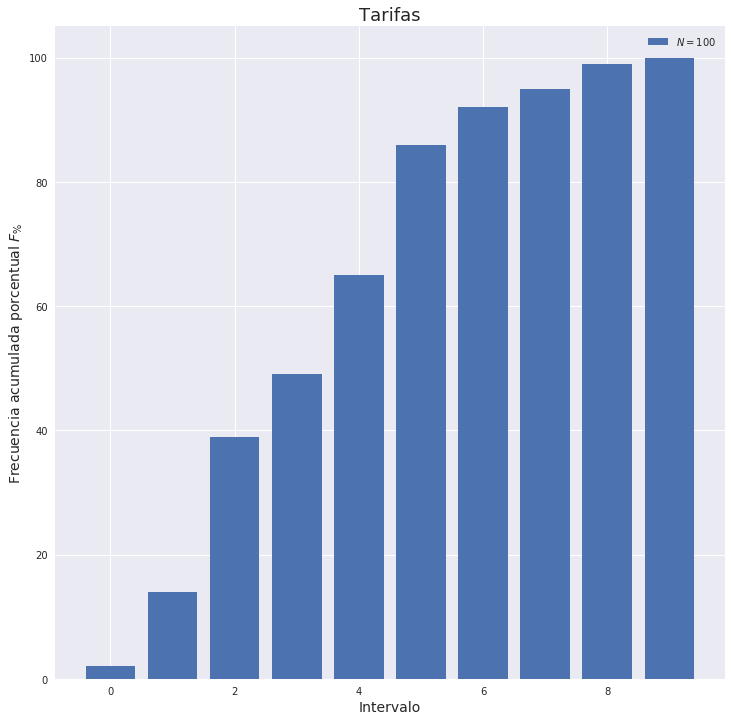

In [7]:
#Se grafica

#Graficando la función de distribución

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))


plt.bar(count, F_p, label = r'$N = 100$')
plt.legend()
plt.xlabel(r'Intervalo', fontsize = 14)
plt.ylabel(r'Frecuencia acumulada porcentual $F_\%$', fontsize = 14)
title(r'Tarifas', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('UberTarifas.png', dpi=300)

In [8]:
#Tiempo

#Obteniendo el rango
#Tiempo

#Obteniendo el rango
R = np.amax(df0.Tiempo)-np.amin(df0.Tiempo)

#Consiguiendo el número de intervalos
k = int(np.sqrt(len(df0)))

#Calculando el ancho del intervalo
w = R/k

#Declarando un arreglo para los límites inferiores y superiores
Lim = []

#Llenando los límites
for i in range(0, k+1):
    a = np.amin(df0.Tiempo) + (w*i)
    Lim.append(a)
    
#Declarando el arreglo de los números de veces que un valor se encuentra en los intervalos
n_A2 = []

#LLenando el arreglo con un contador
a = b = c = d = e = f = g = h = m = j = 0
for i in range(0, len(df0)):
    if df0.Tiempo[i]>=Lim[0] and df0.Tiempo[i]<Lim[1]:
        a = a + 1
    elif df0.Tiempo[i]>=Lim[1] and df0.Tiempo[i]<Lim[2]:
        b = b + 1
    elif df0.Tiempo[i]>=Lim[2] and df0.Tiempo[i]<Lim[3]:
        c = c + 1
    elif df0.Tiempo[i]>=Lim[3] and df0.Tiempo[i]<Lim[4]:
        d = d + 1
    elif df0.Tiempo[i]>=Lim[4] and df0.Tiempo[i]<Lim[5]:
        e = e + 1
    elif df0.Tiempo[i]>=Lim[5] and df0.Tiempo[i]<=Lim[6]:
        f = f + 1
    elif df0.Tiempo[i]>=Lim[6] and df0.Tiempo[i]<=Lim[7]:
        g = g + 1
    elif df0.Tiempo[i]>=Lim[7] and df0.Tiempo[i]<=Lim[8]:
        h = h + 1
    elif df0.Tiempo[i]>=Lim[8] and df0.Tiempo[i]<=Lim[9]:
        m = m + 1
    elif df0.Tiempo[i]>=Lim[9] and df0.Tiempo[i]<=Lim[10]:
        j = j + 1
        
n_A2.append(a)
n_A2.append(b)
n_A2.append(c)
n_A2.append(d)
n_A2.append(e)
n_A2.append(f)
n_A2.append(g)
n_A2.append(h)
n_A2.append(m)
n_A2.append(j)

#Declarando el arreglo de las frecuencias:

#Frecuencia relativa
f_A2 = []

#Frecuencia relativa porcentual
f_p2 = []

#Frecuencia acumulada
F_A2 = []

#Frecuencia acumulada porcentual
F_p2 = []

#Obteniendo las frecuencias:

#Frecuencia relativa
for i in range(0, k):
    a = n_A2[i]/len(df0)
    f_A2.append(a)

#Frecuencia relativa porcentual
for i in range(0, k):
    a = f_A2[i]*100
    f_p2.append(a)

#Frecuencia acumulada
for i in range(0, k):
    if i==0:
        a = f_A2[i]
        F_A2.append(a)
    elif i>0:
        a = f_A2[i] + F_A2[i-1]
        F_A2.append(a)

#Frecuencia acumulada porcentual
for i in range(0, k):
    a = F_A2[i]*100
    F_p2.append(a)

In [9]:
#Se llenan los límites inferiores
Lim_inf2 = []
for i in range(0, k):
    a = Lim[i]
    Lim_inf2.append(a)

#Se llenan los límites superiores
Lim_sup2 = []
for i in range(0, k):
    a = Lim[i+1]
    Lim_sup2.append(a)

In [10]:
#Se declara un DataFrame con estos datos
#Se hacen las listas
data2 = list(zip(Lim_inf2, Lim_sup2, n_A2, f_A2, f_p2, F_A2, F_p2))

#Se hace un DataFrame con los datos obtenidos
df2 = pd.DataFrame(data2, columns = [r'$L_i$', r'$L_s$', r'$f$', r'$\widetilde{f}$', r'$f_\%$)', r'$F$', r'$F_\%$' ])
df2

,$L_i$,$L_s$,$f$,$\widetilde{f}$,$f_\%$),$F$,$F_\%$
0,3.81260,6.27022,14,0.14,14.0,0.14,14.0
1,6.27022,8.72784,24,0.24,24.0,0.38,38.0
2,8.72784,11.18546,10,0.10,10.0,0.48,48.0
3,11.18546,13.64308,11,0.11,11.0,0.59,59.0
4,13.64308,16.10070,20,0.20,20.0,0.79,79.0
5,16.10070,18.55832,12,0.12,12.0,0.91,91.0
6,18.55832,21.01594,2,0.02,2.0,0.93,93.0
7,21.01594,23.47356,3,0.03,3.0,0.96,96.0
8,23.47356,25.93118,3,0.03,3.0,0.99,99.0
9,25.93118,28.38880,1,0.01,1.0,1.00,100.0


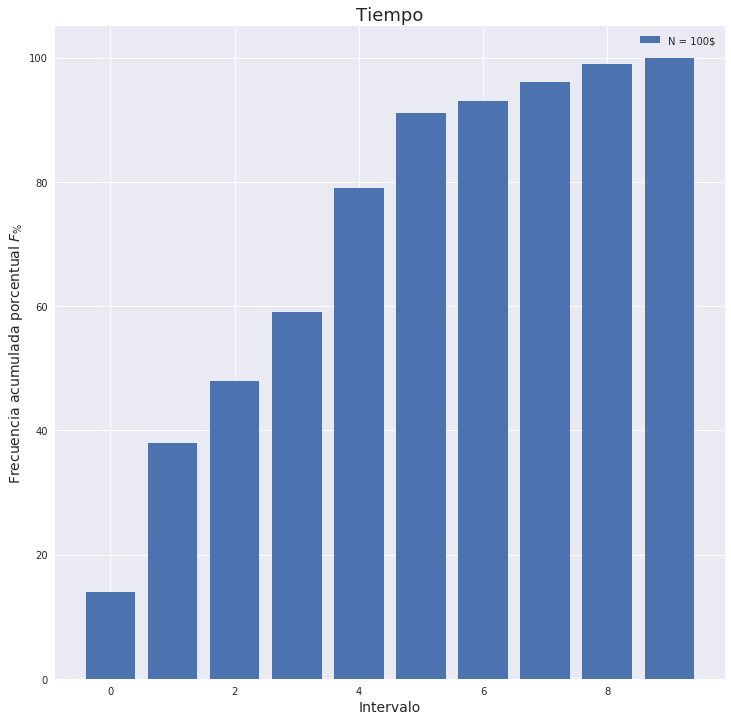

In [11]:
#Se grafica

#Graficando la función de distribución

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))


plt.bar(count, F_p2, label = r'N = 100$')
plt.legend()
plt.xlabel(r'Intervalo', fontsize = 14)
plt.ylabel(r'Frecuencia acumulada porcentual $F_\%$', fontsize = 14)
title(r'Tiempo', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('UberTiempo.png', dpi=300)

In [12]:
#Hora

#Obteniendo el rango
#Hora

#Obteniendo el rango
R = np.amax(df0.Hora)-np.amin(df0.Hora)

#Consiguiendo el número de intervalos
k = int(np.sqrt(len(df0)))

#Calculando el ancho del intervalo
w = R/k

#Declarando un arreglo para los límites inferiores y superiores
Lim = []

#Llenando los límites
for i in range(0, k+1):
    a = np.amin(df0.Hora) + (w*i)
    Lim.append(a)
    
#Declarando el arreglo de los números de veces que un valor se encuentra en los intervalos
n_A3 = []

#LLenando el arreglo con un contador
a = b = c = d = e = f = g = h = m = j = 0
for i in range(0, len(df0)):
    if df0.Hora[i]>=Lim[0] and df0.Hora[i]<Lim[1]:
        a = a + 1
    elif df0.Hora[i]>=Lim[1] and df0.Hora[i]<Lim[2]:
        b = b + 1
    elif df0.Hora[i]>=Lim[2] and df0.Hora[i]<Lim[3]:
        c = c + 1
    elif df0.Hora[i]>=Lim[3] and df0.Hora[i]<Lim[4]:
        d = d + 1
    elif df0.Hora[i]>=Lim[4] and df0.Hora[i]<Lim[5]:
        e = e + 1
    elif df0.Hora[i]>=Lim[5] and df0.Hora[i]<=Lim[6]:
        f = f + 1
    elif df0.Hora[i]>=Lim[6] and df0.Hora[i]<=Lim[7]:
        g = g + 1
    elif df0.Hora[i]>=Lim[7] and df0.Hora[i]<=Lim[8]:
        h = h + 1
    elif df0.Hora[i]>=Lim[8] and df0.Hora[i]<=Lim[9]:
        m = m + 1
    elif df0.Hora[i]>=Lim[9] and df0.Hora[i]<=Lim[10]:
        j = j + 1
        
n_A3.append(a)
n_A3.append(b)
n_A3.append(c)
n_A3.append(d)
n_A3.append(e)
n_A3.append(f)
n_A3.append(g)
n_A3.append(h)
n_A3.append(m)
n_A3.append(j)

#Declarando el arreglo de las frecuencias:

#Frecuencia relativa
f_A3 = []

#Frecuencia relativa porcentual
f_p3 = []

#Frecuencia acumulada
F_A3 = []

#Frecuencia acumulada porcentual
F_p3 = []

#Obteniendo las frecuencias:

#Frecuencia relativa
for i in range(0, k):
    a = n_A3[i]/len(df0)
    f_A3.append(a)

#Frecuencia relativa porcentual
for i in range(0, k):
    a = f_A3[i]*100
    f_p3.append(a)

#Frecuencia acumulada
for i in range(0, k):
    if i==0:
        a = f_A3[i]
        F_A3.append(a)
    elif i>0:
        a = f_A3[i] + F_A3[i-1]
        F_A3.append(a)

#Frecuencia acumulada porcentual
for i in range(0, k):
    a = F_A3[i]*100
    F_p3.append(a)

In [13]:
#Se llenan los límites inferiores
Lim_inf3 = []
for i in range(0, k):
    a = Lim[i]
    Lim_inf3.append(a)

#Se llenan los límites superiores
Lim_sup3= []
for i in range(0, k):
    a = Lim[i+1]
    Lim_sup3.append(a)

In [14]:
#Se declara un DataFrame con estos datos
#Se hacen las listas
data3 = list(zip(Lim_inf3, Lim_sup3, n_A3, f_A3, f_p3, F_A3, F_p3))

#Se hace un DataFrame con los datos obtenidos
df3 = pd.DataFrame(data3, columns = [r'$L_i$', r'$L_s$', r'$f$', r'$\widetilde{f}$', r'$f_\%$)', r'$F$', r'$F_\%$' ])
df3

,$L_i$,$L_s$,$f$,$\widetilde{f}$,$f_\%$),$F$,$F_\%$
0,0.066666,2.443333,5,0.05,5.0,0.05,5.0
1,2.443333,4.819999,3,0.03,3.0,0.08,8.0
2,4.819999,7.196666,18,0.18,18.0,0.26,26.0
3,7.196666,9.573333,24,0.24,24.0,0.50,50.0
4,9.573333,11.950000,9,0.09,9.0,0.59,59.0
5,11.950000,14.326666,10,0.10,10.0,0.69,69.0
6,14.326666,16.703333,4,0.04,4.0,0.73,73.0
7,16.703333,19.080000,3,0.03,3.0,0.76,76.0
8,19.080000,21.456667,8,0.08,8.0,0.84,84.0
9,21.456667,23.833333,16,0.16,16.0,1.00,100.0


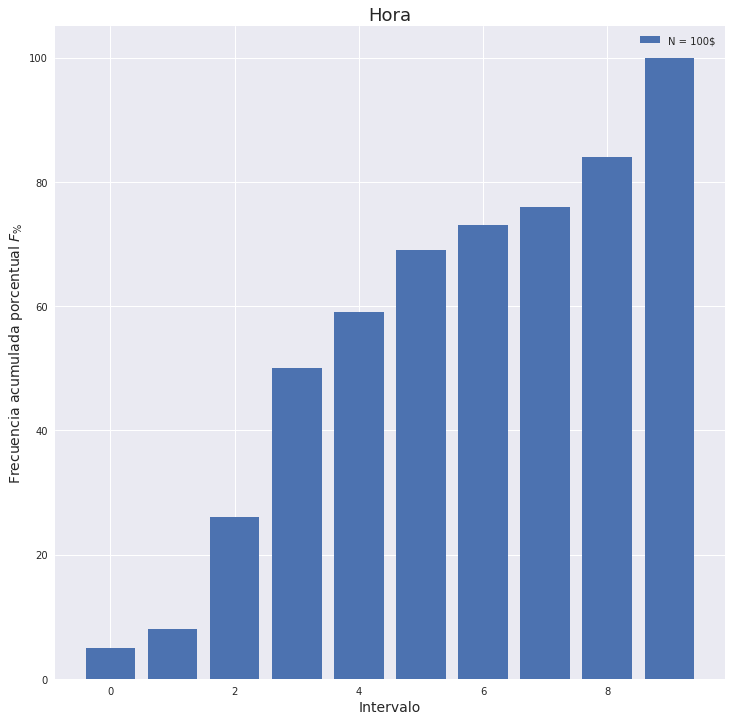

In [15]:
#Se grafica

#Graficando la función de distribución

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))


plt.bar(count, F_p3, label = r'N = 100$')
plt.legend()
plt.xlabel(r'Intervalo', fontsize = 14)
plt.ylabel(r'Frecuencia acumulada porcentual $F_\%$', fontsize = 14)
title(r'Hora', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('UberHora.png', dpi=300)